# 作业七

## 1.利用公式:$$\sqrt{2m(V_{0}-E_{B})}\tan{[a\sqrt{2m(V_{0}-E_{B})}]}=\sqrt{2mE_{B}}$$ $$\sqrt{2m(V_{0}-E_{B})}\cot{[a\sqrt{2m(V_{0}-E_{B})}]}=\sqrt{2mE_{B}}$$ 计算量子力学里面有限深方势阱的能级，最好能够复现量子力学课本上的计算结果，即不同参数条件下都能把能级找到。

## 现学薛定谔方程：
$$\begin{align*}     \begin{split}    V(x)= \left \{    \begin{array}{ll}        -V_0,|x|<a/2\\ 0,   |x|>a/2    \end{array}    \right.    \end{split}    \end{align*}$$
### 在势阱内：
$$\frac{d^2\psi}{dx^2} + \frac{2m}{\hbar^2}(E -V)\psi = 0\\\frac{d^2\psi}{dx^2} + \frac{2m}{\hbar^2}(E +V_0)\psi = 0\\\frac{d^2\psi}{dx^2}=-k^2\psi, \quad k = \sqrt{2m(V_0 + E)}$$

In [29]:
import matplotlib.pyplot as plt
import numpy as np

class Schrodinger:
    def __init__(self, potential_func, 
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=1000):
        self.x = np.linspace(xmin, xmax, ninterval)    
        self.U = np.diag(potential_func(self.x), 0)        
        self.Lap = self.laplacian(ninterval)        
        self.H = - hbar**2 / (2*mass) * self.Lap + self.U       
        self.eigE, self.eigV = self.eig_solve()
            
        
    def laplacian(self, N):
        '''构造二阶微分算子：Laplacian'''
        dx = self.x[1] - self.x[0]
        return (-2 * np.diag(np.ones((N), np.float32), 0)+np.diag(np.ones((N-1), np.float32), 1)+np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
    
    def eig_solve(self):
        '''解哈密顿矩阵的本征值，本征向量；并对本征向量排序'''
        w, v = np.linalg.eig(self.H)  
        idx_sorted = np.argsort(w)     
        return w[idx_sorted], v[:, idx_sorted]
    
    def wave_func(self, n=0):
        return self.eigV[:, n]

    def eigen_value(self, n=0):
        return self.eigE[n]
    
    def check_eigen(self, n=7):
        '''check wheter H|psi> = E |psi> '''
        with plt.style.context(['science', 'ieee','no-latex']):
            HPsi = np.dot(self.H, self.eigV[:, n])
            EPsi = self.eigE[n] * self.eigV[:, n]
            plt.plot(self.x, HPsi, label=r'$H|\psi_{%s} \rangle$'%n)
            plt.plot(self.x, EPsi, '-.', label=r'$E |\psi_{%s} \rangle$'%n)
            plt.legend(loc='upper center')
            plt.xlabel(r'$x$')
            plt.ylim(EPsi.min(), EPsi.max() * 1.6)
            plt.show()
            
    def plot_density(self, n=7):
        with plt.style.context(['science', 'ieee','no-latex']):
            rho = self.eigV[:, n] * self.eigV[:, n]
            plt.plot(self.x, rho)
            plt.title(r'$E_{%s}=%.2f$'%(n, self.eigE[n]))
            plt.ylabel(r'$\rho_{%s}(x)=\psi_{%s}^*(x)\psi_{%s}(x)$'%(n, n, n))
            plt.xlabel(r'$x$')
            plt.show()
            
    def plot_potential(self):
        with plt.style.context(['science', 'ieee','no-latex']):
            plt.plot(self.x, np.diag(self.U))
            plt.ylabel(r'potential')
            plt.xlabel(r'$x$')
            plt.show
    
    #双势阱       
    def double_well(x, xmax=5, N=100):
        w = xmax / N
        a = 3 * w
        return -100 * (np.heaviside(x + w - a, 0.5) - np.heaviside(x - w - a, 0.5)+np.heaviside(x + w + a, 0.5) - np.heaviside(x - w + a, 0.5))
            
# 定义谐振子势
def harmonic_potential(x, k=100):
    return 0.5 * k * x**2

# 创建谐振子势下的薛定谔方程
schro_harmonic = Schrodinger(harmonic_potential)

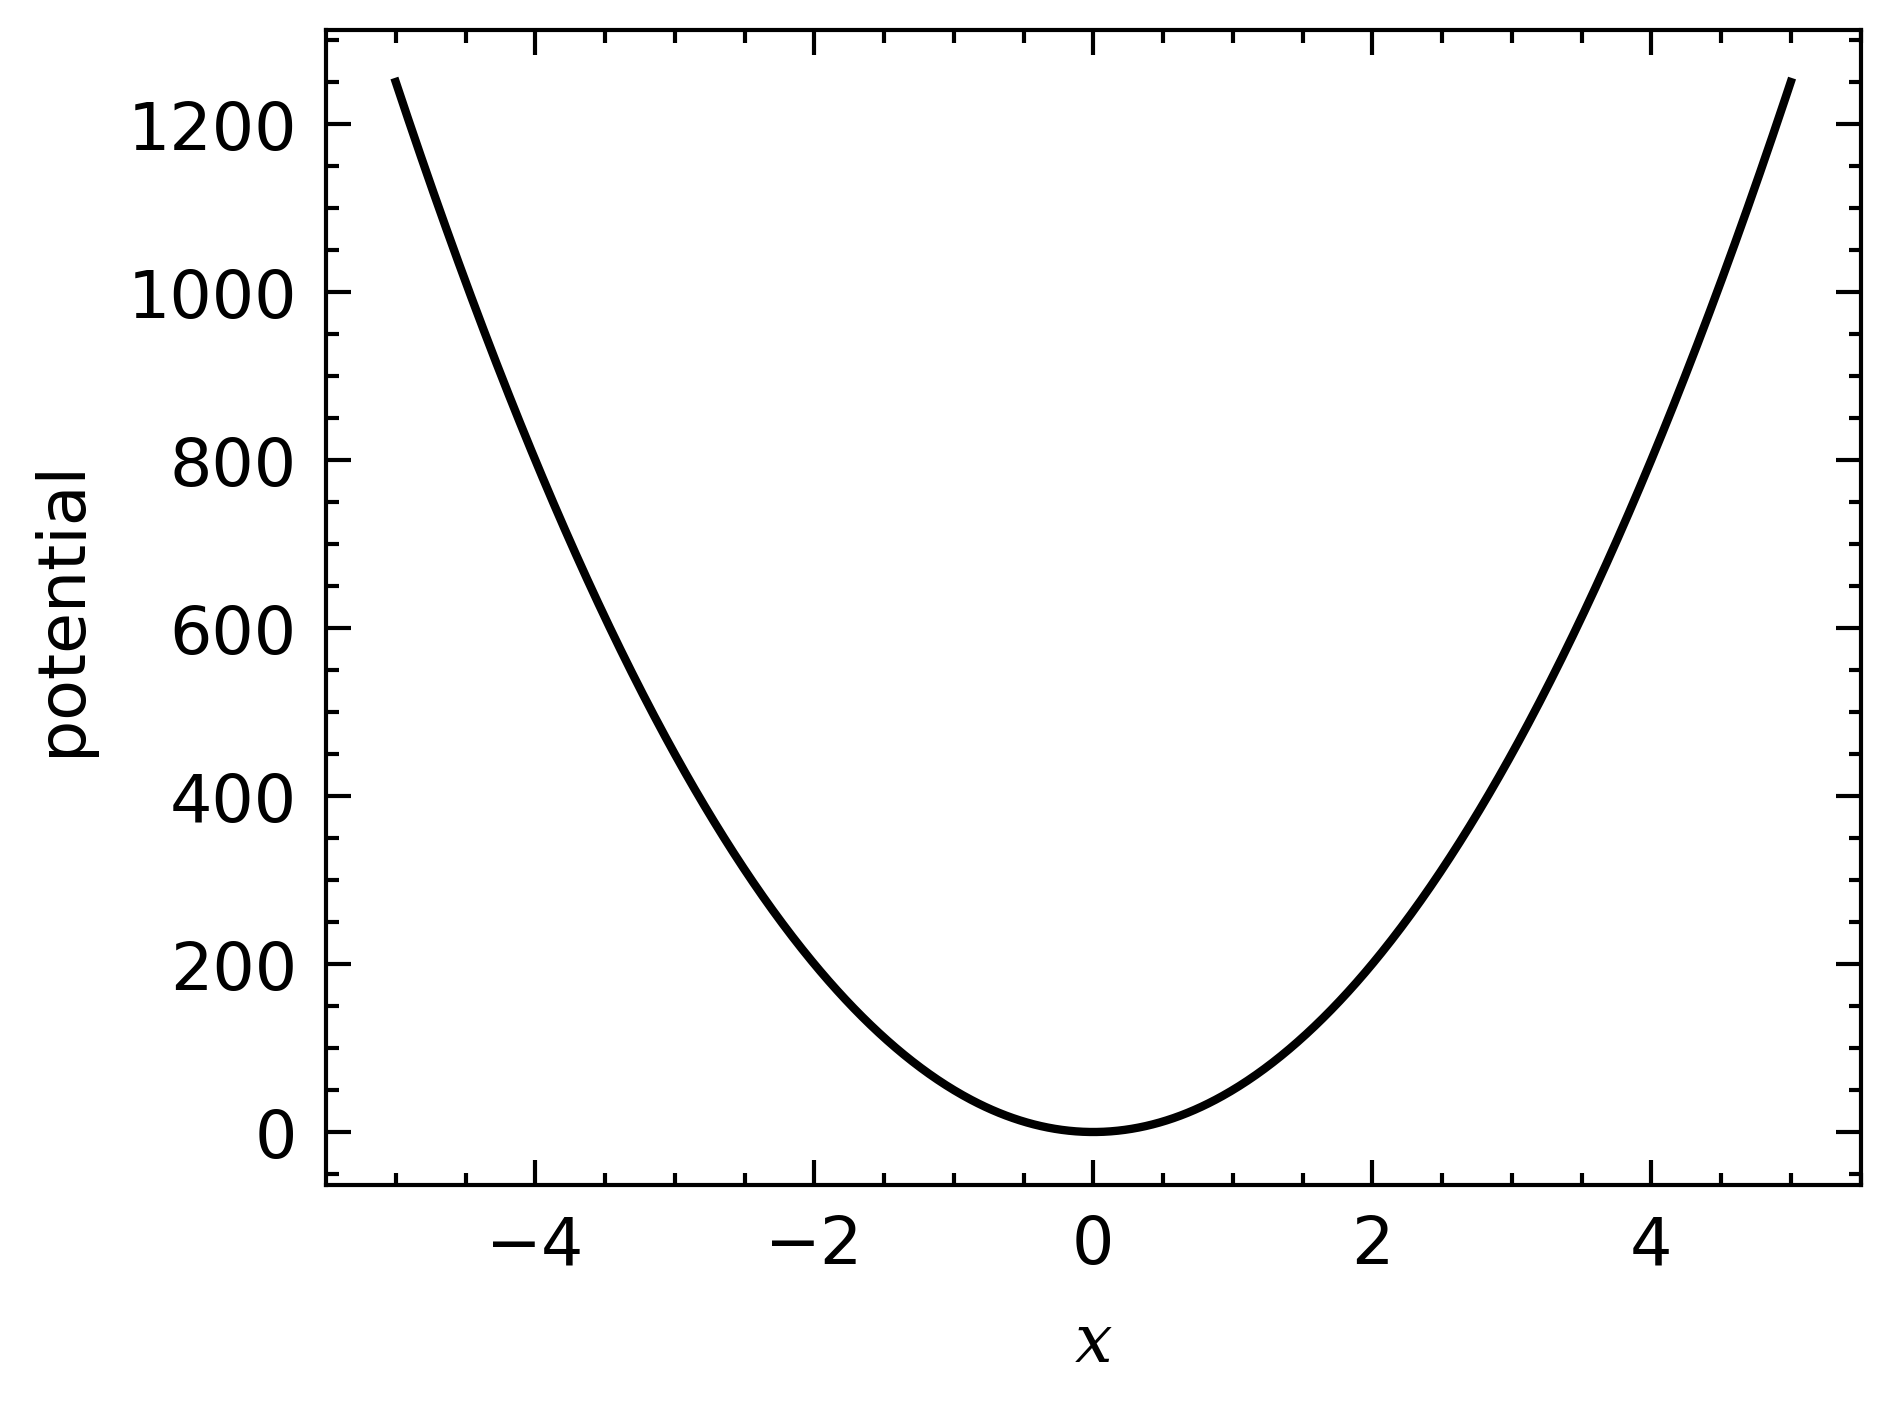

In [19]:
#一维可视化谐振子势能
schro_harmonic.plot_potential()

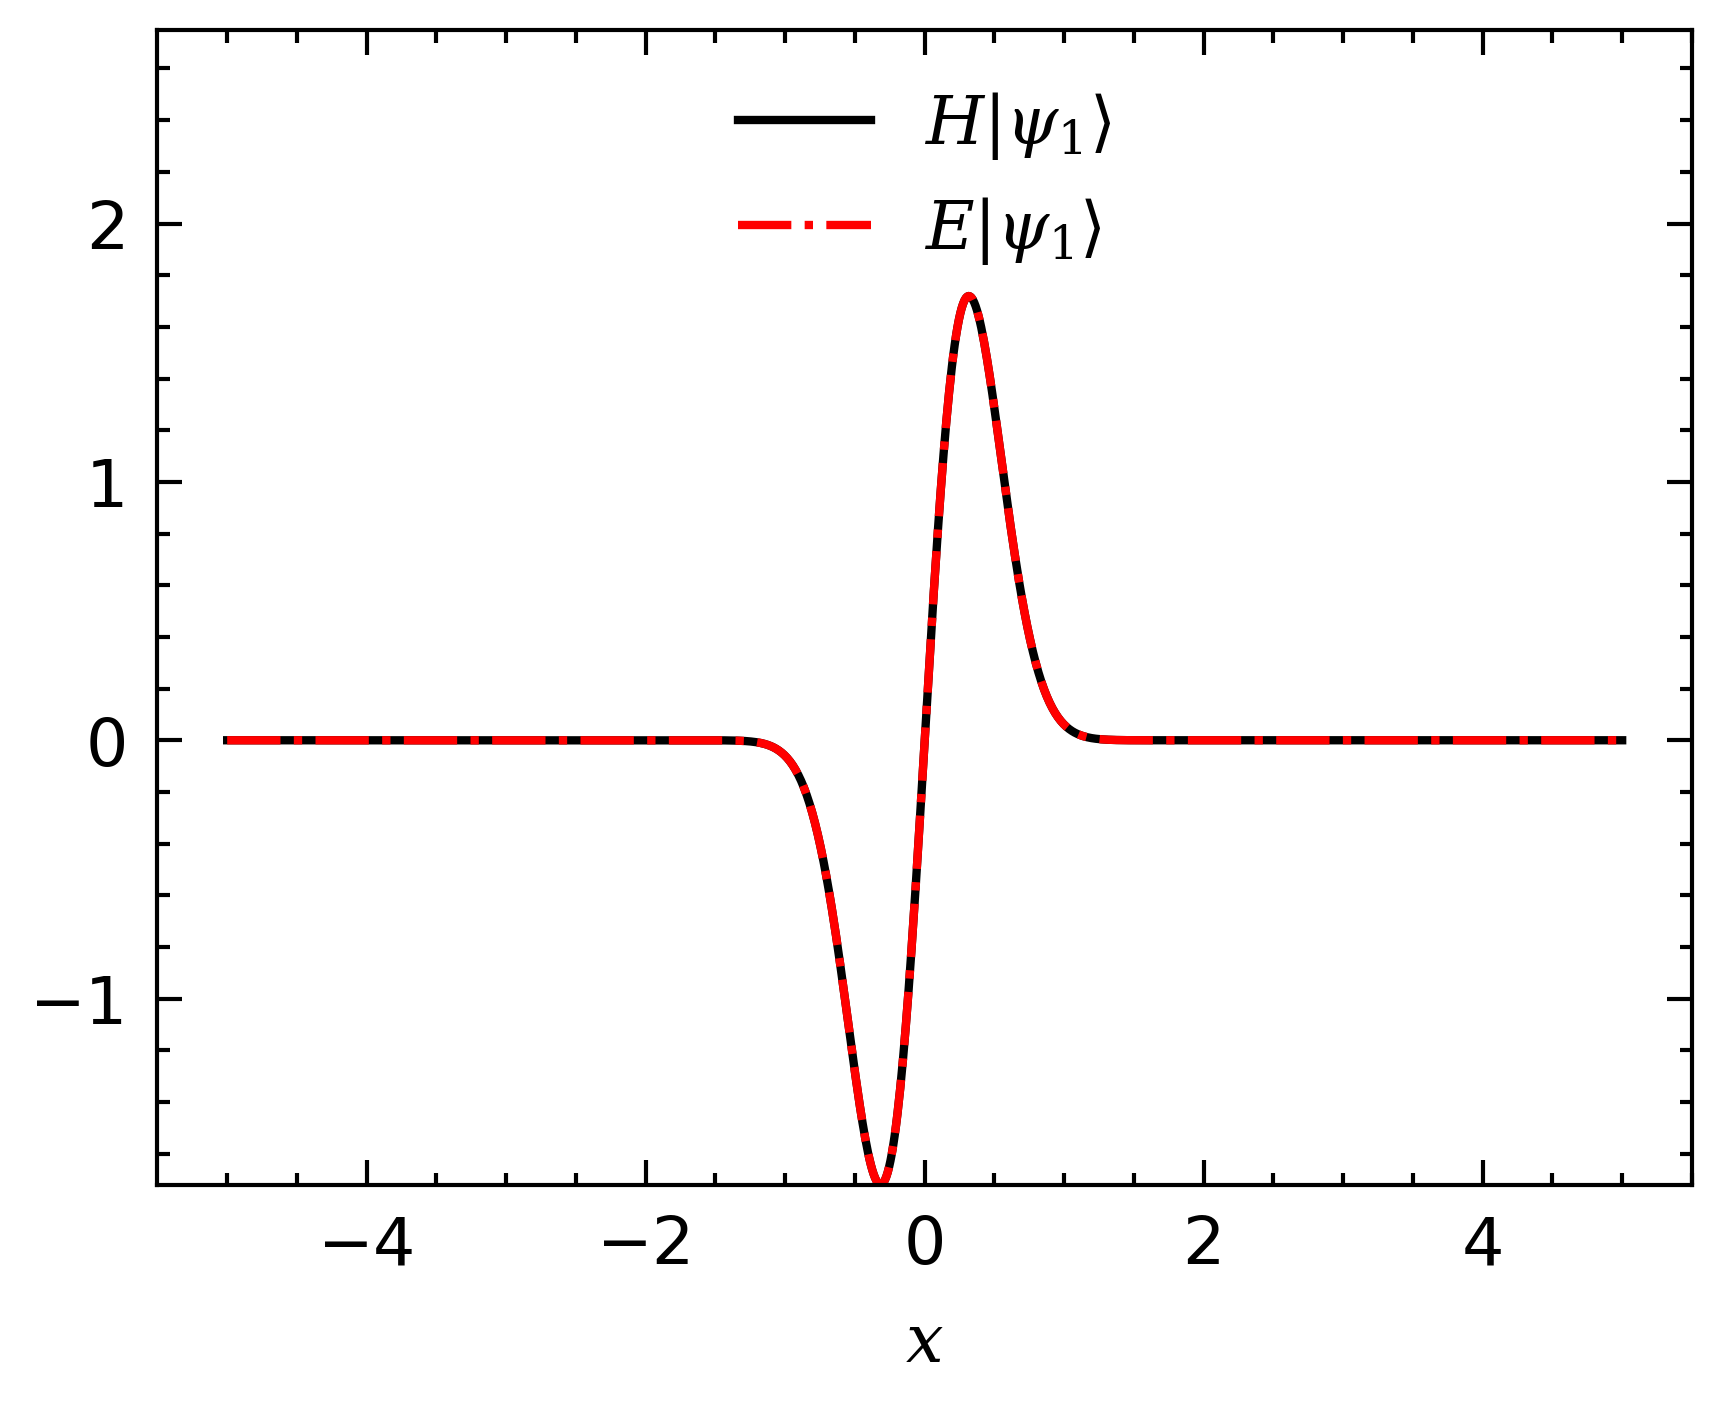

In [20]:
#是否满足本征方程条件
schro_harmonic.check_eigen(n=1)

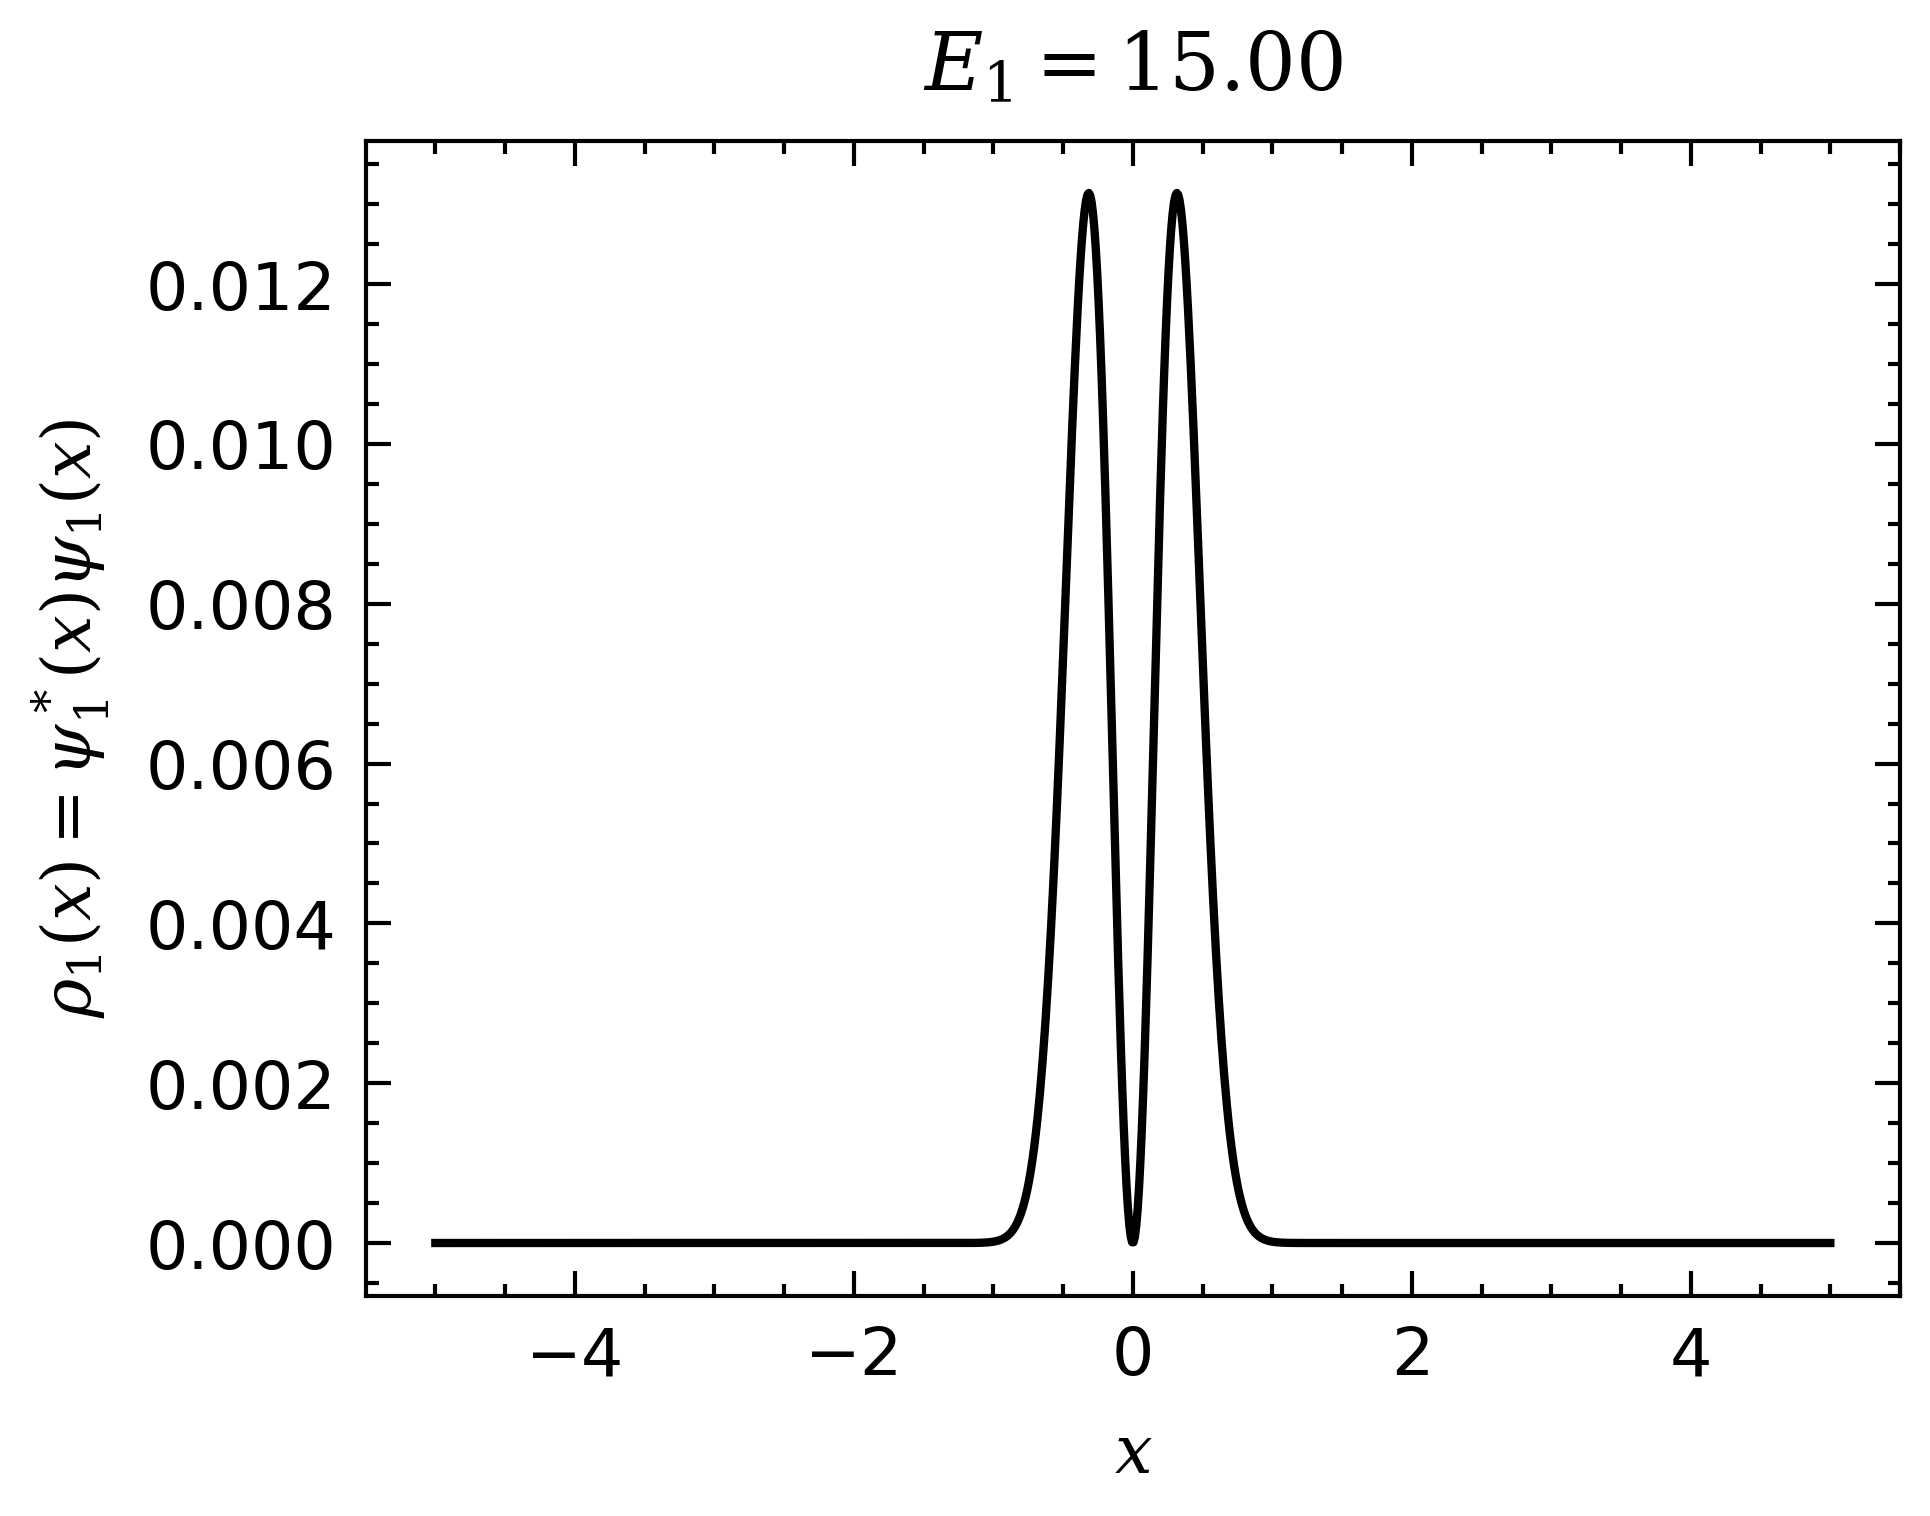

In [23]:
#粒子在谐振子势阱中的分布概率密度
schro_harmonic.plot_density(n=1)

In [24]:
def woods_saxon_potential(x, R0=6.2, surface_thickness=0.5):
    sigma = surface_thickness
    return  -1 / (1 + np.exp((np.abs(x) - R0)/sigma))
ws_schro = Schrodinger(woods_saxon_potential)

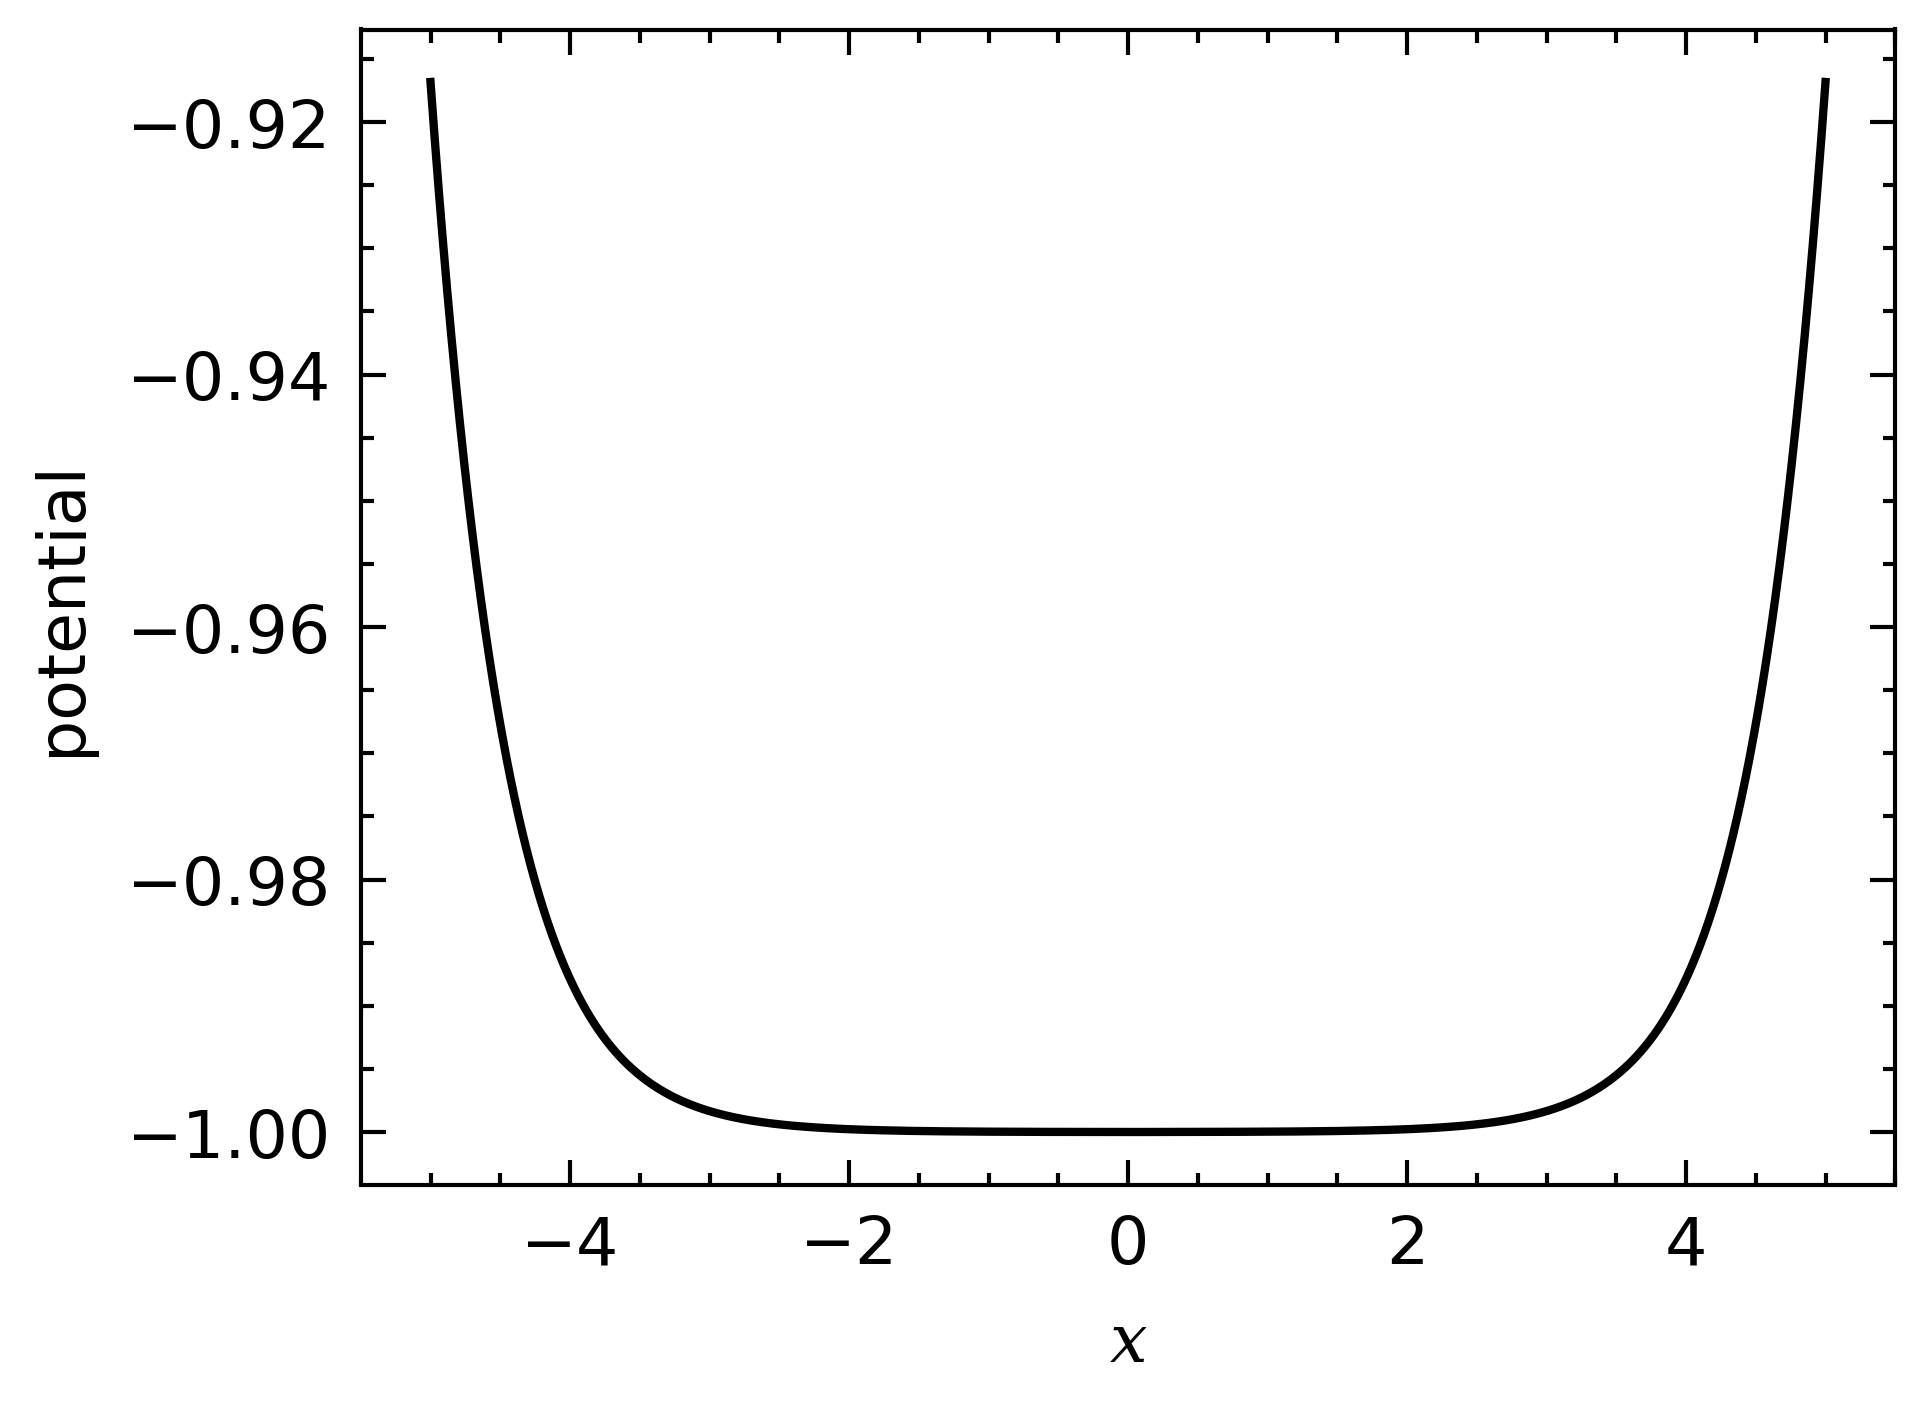

In [25]:
#Woods Saxon 势能势阱
ws_schro.plot_potential()

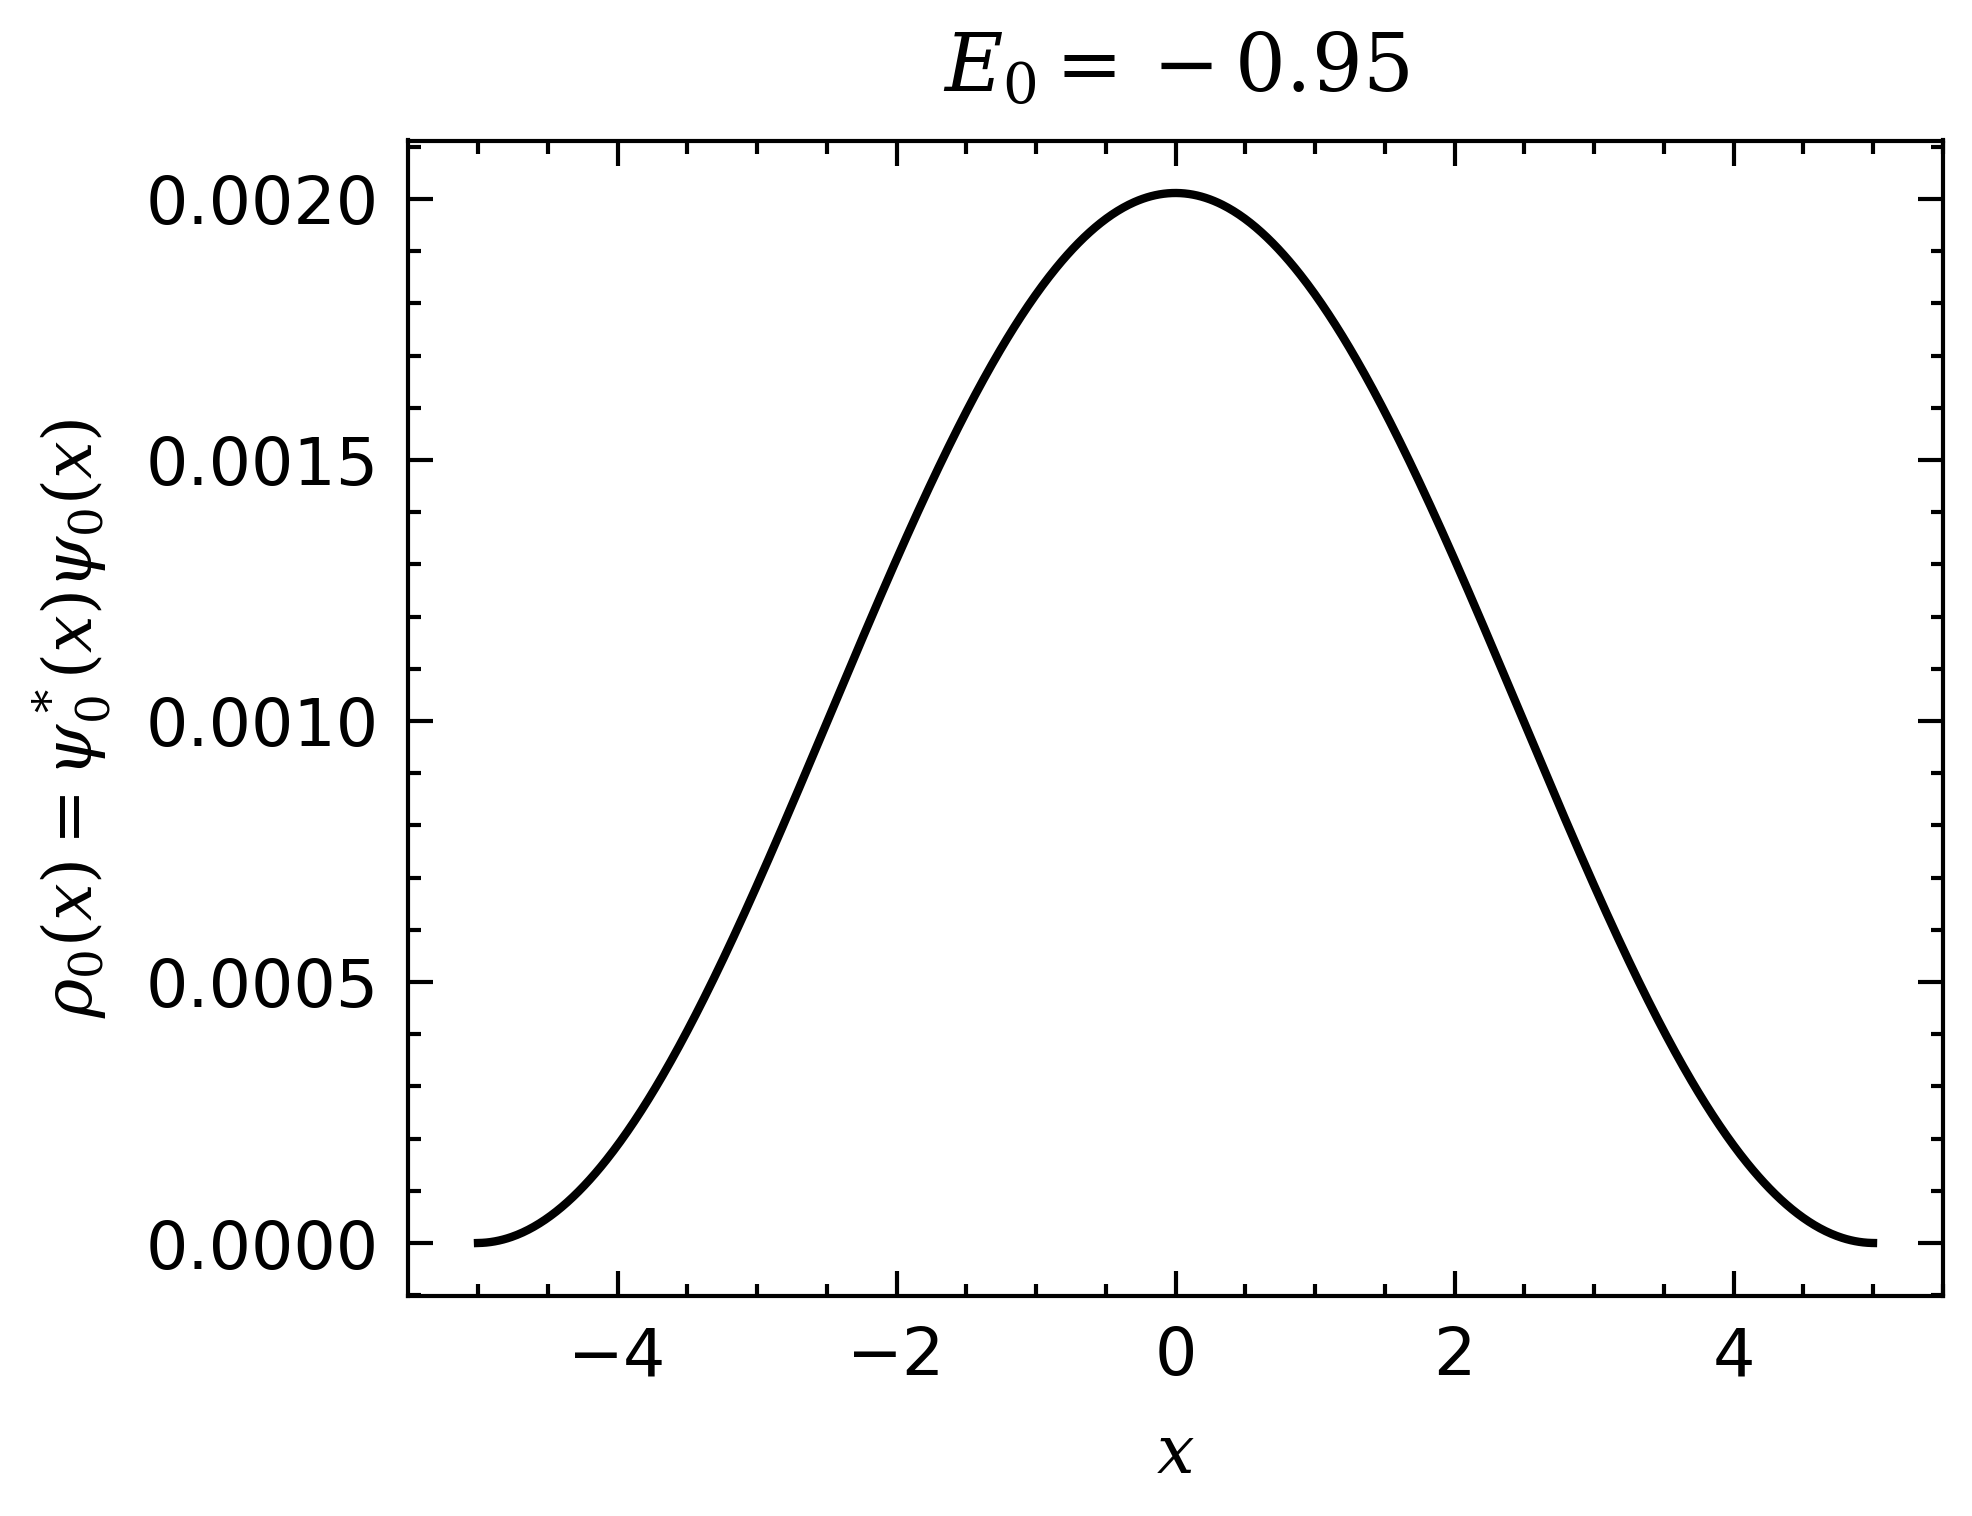

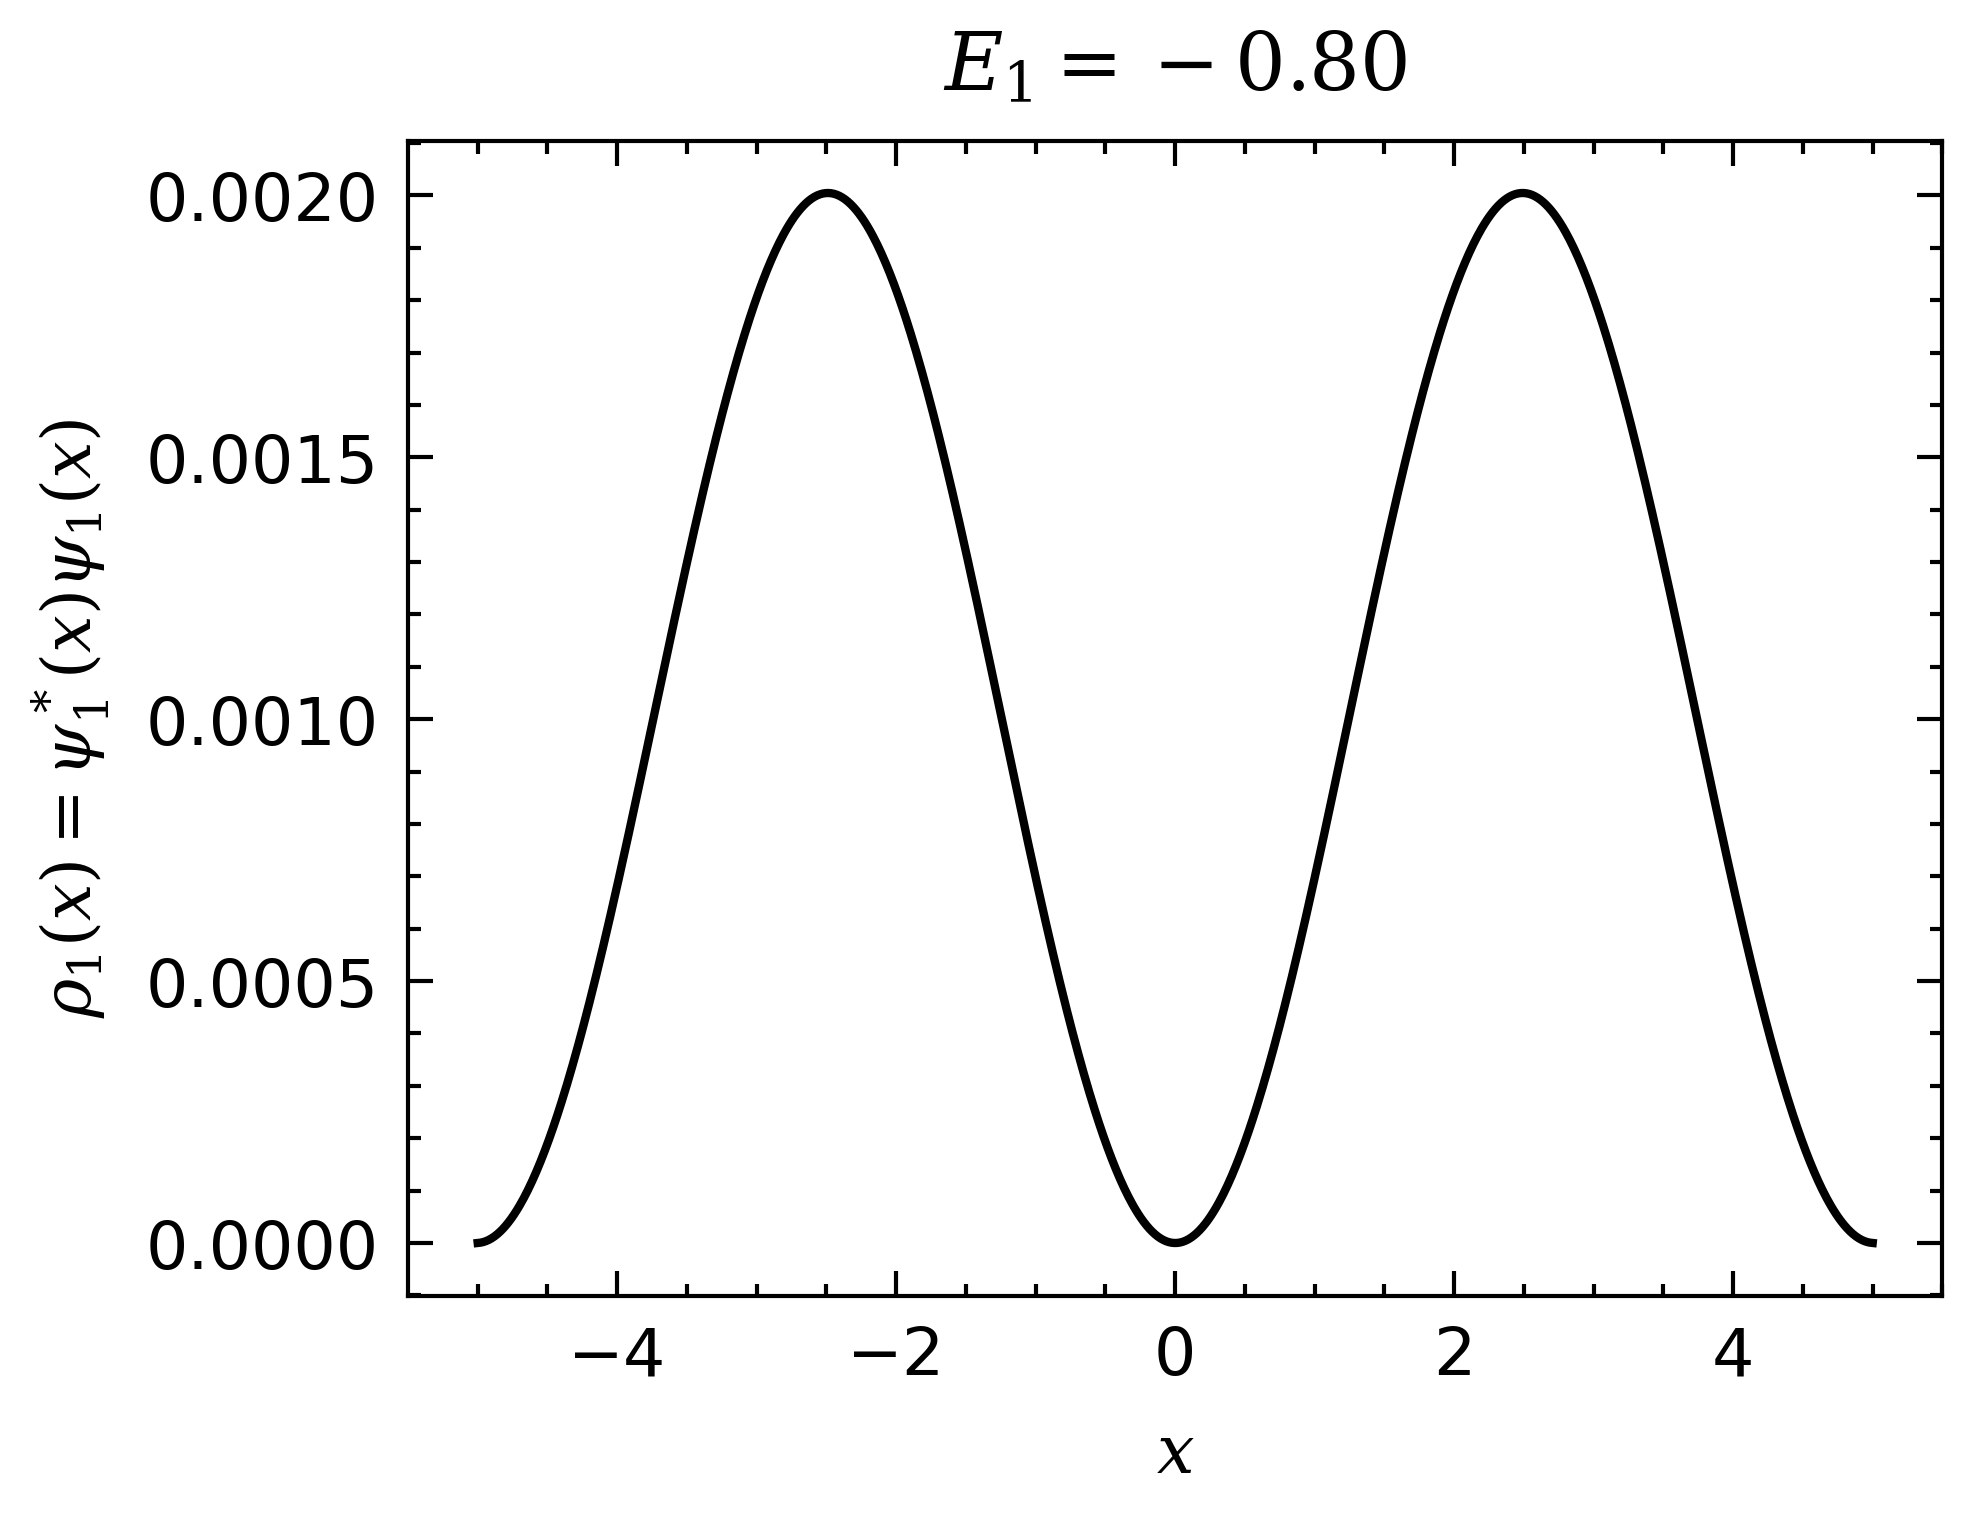

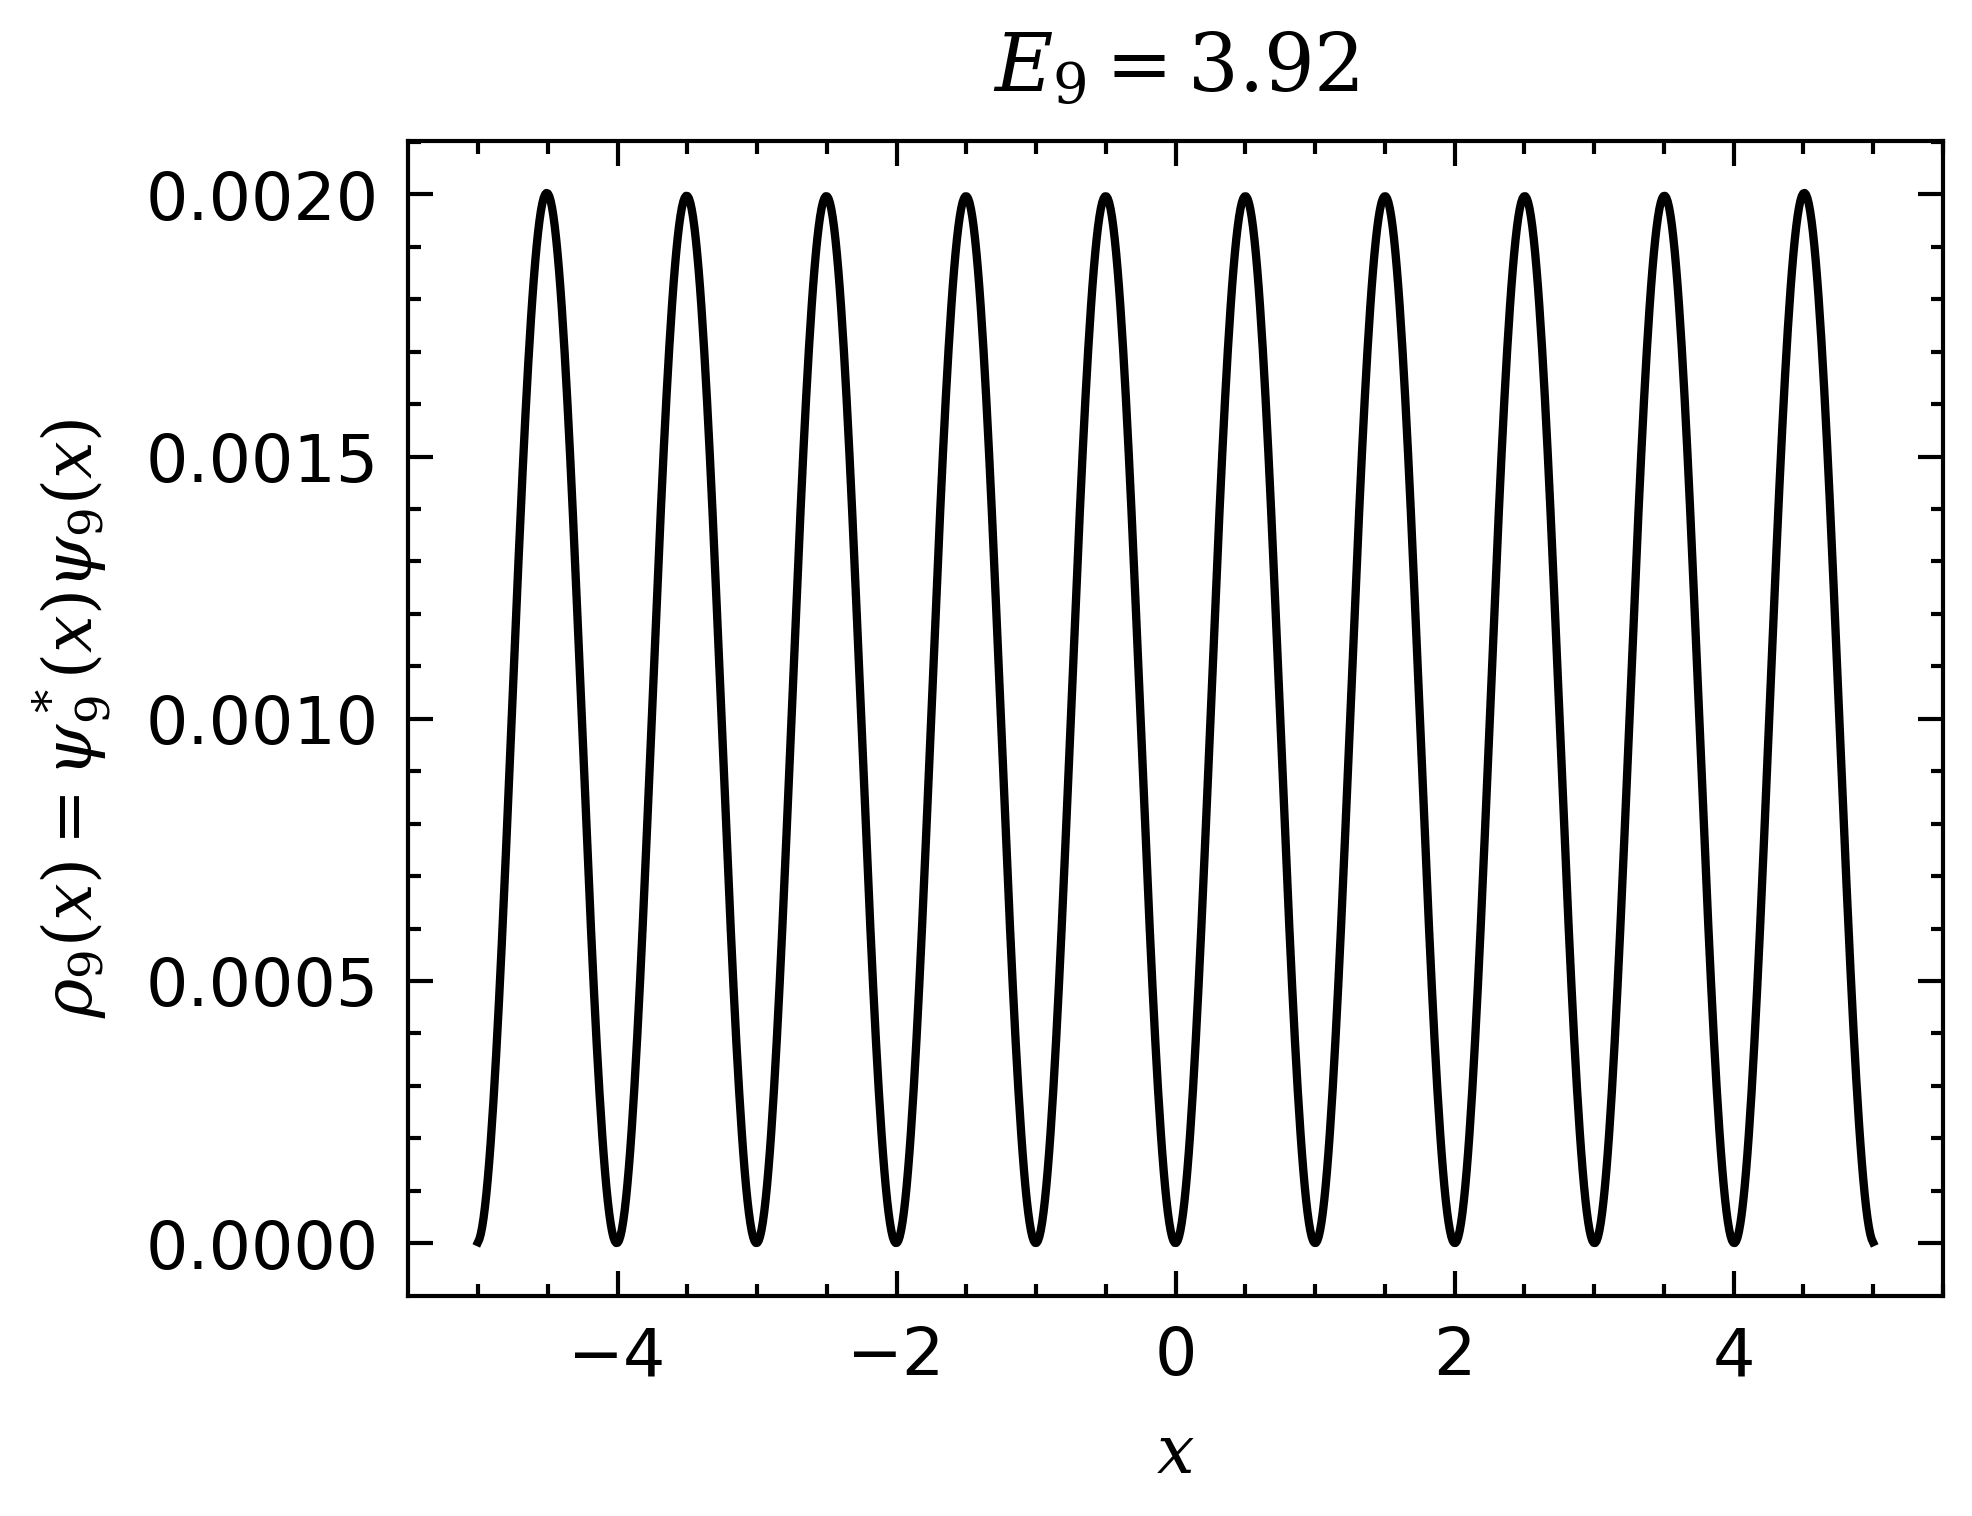

In [27]:
#波函数和能级(取0、1、9):
ws_schro.plot_density(n=0)
ws_schro.plot_density(n=1)
ws_schro.plot_density(n=9)

## 双势阱

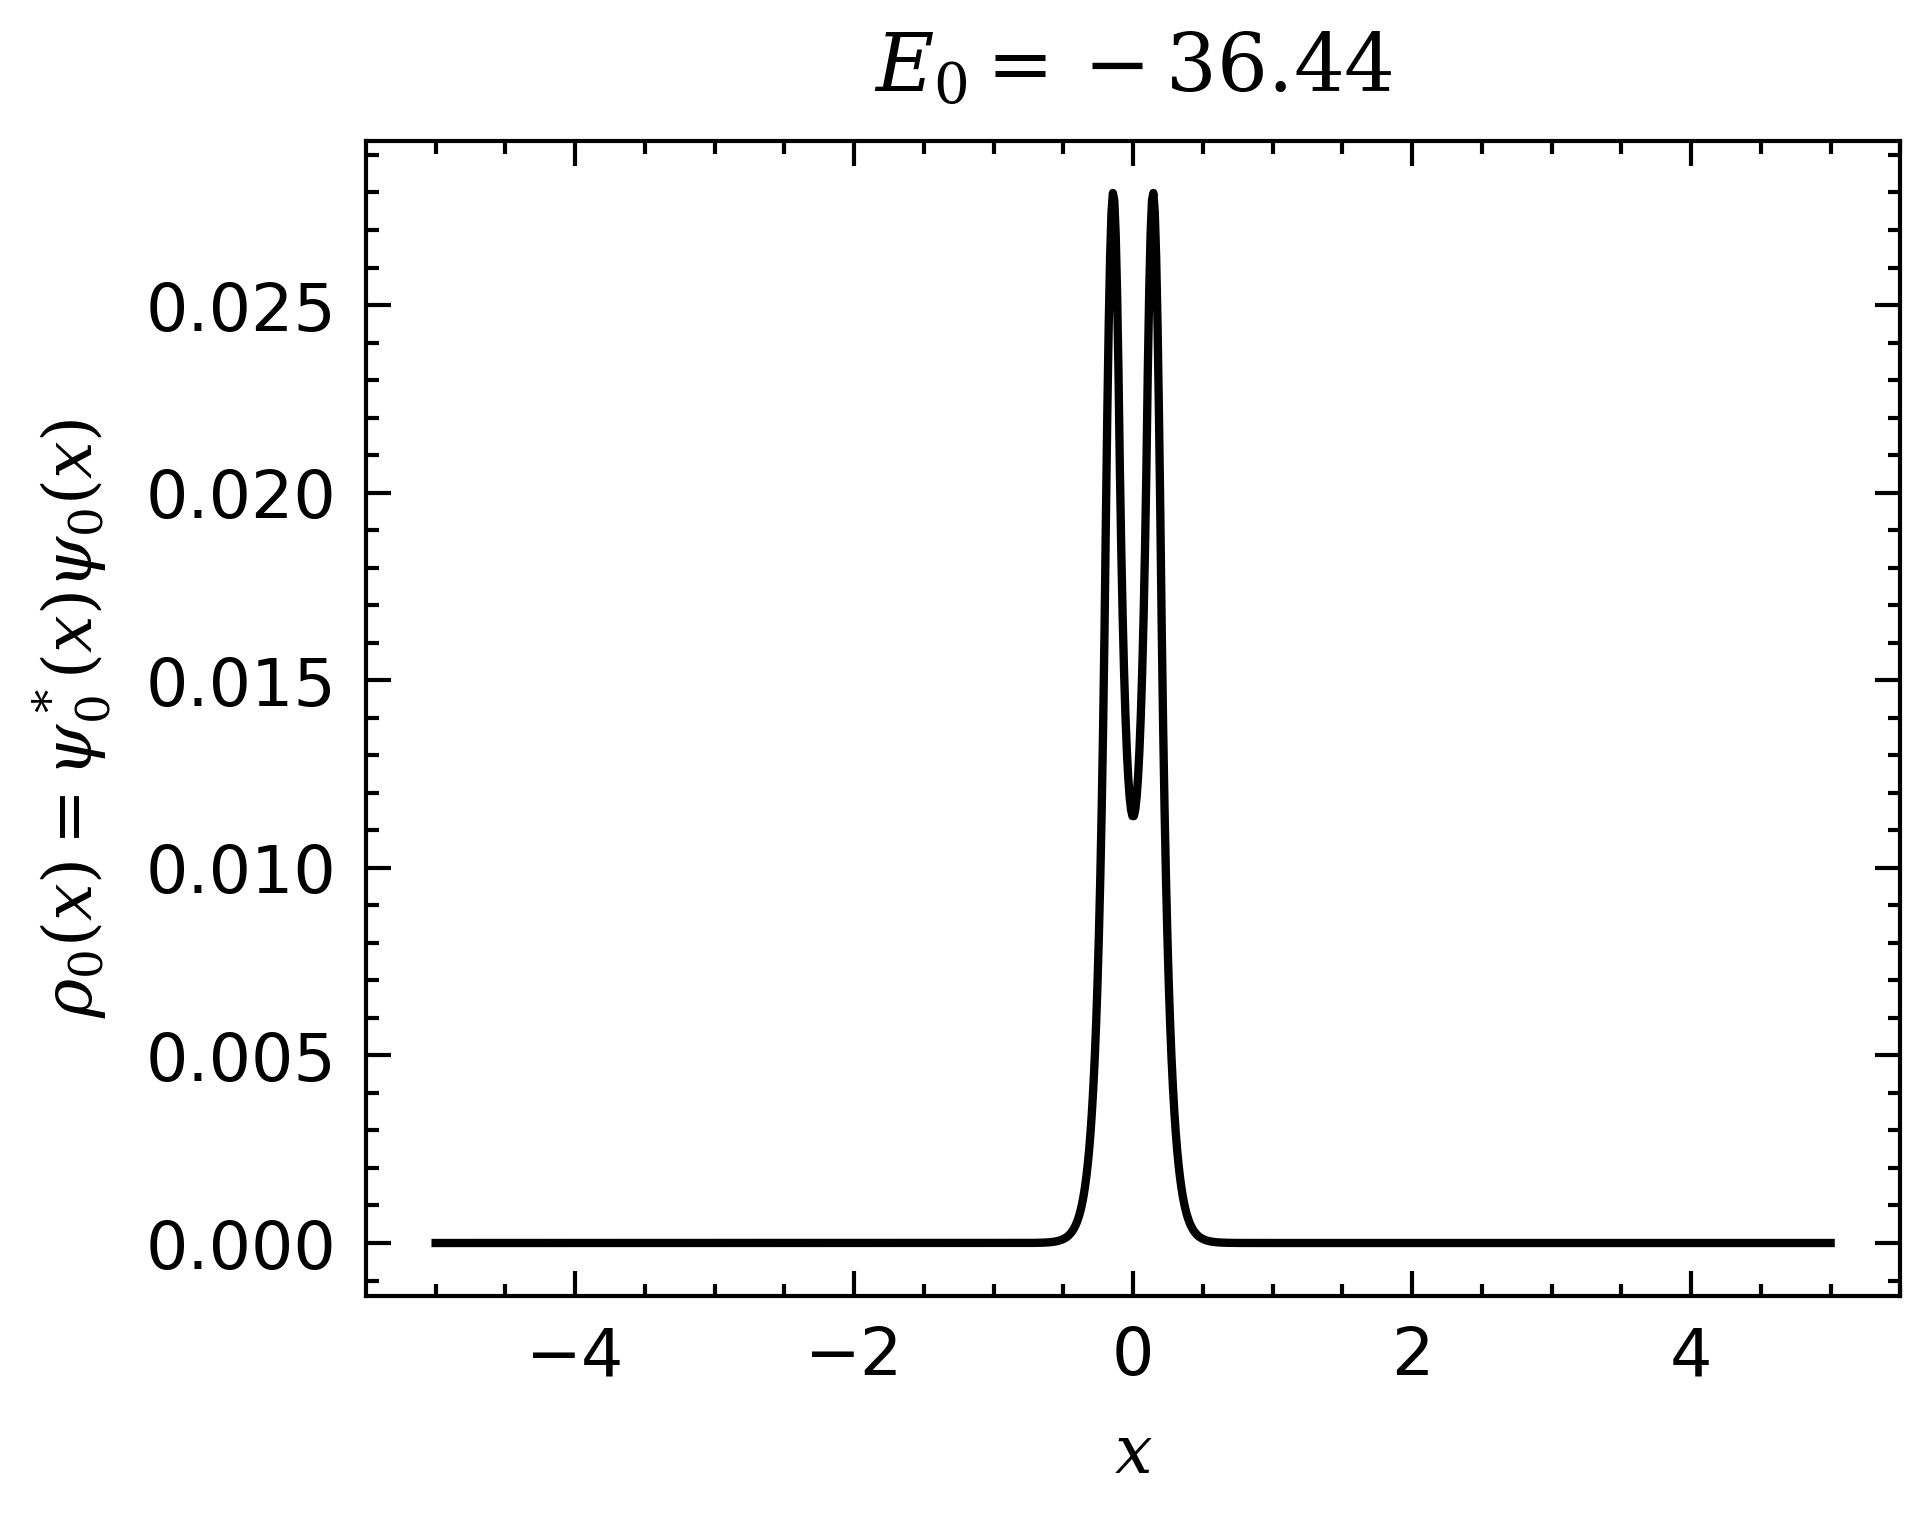

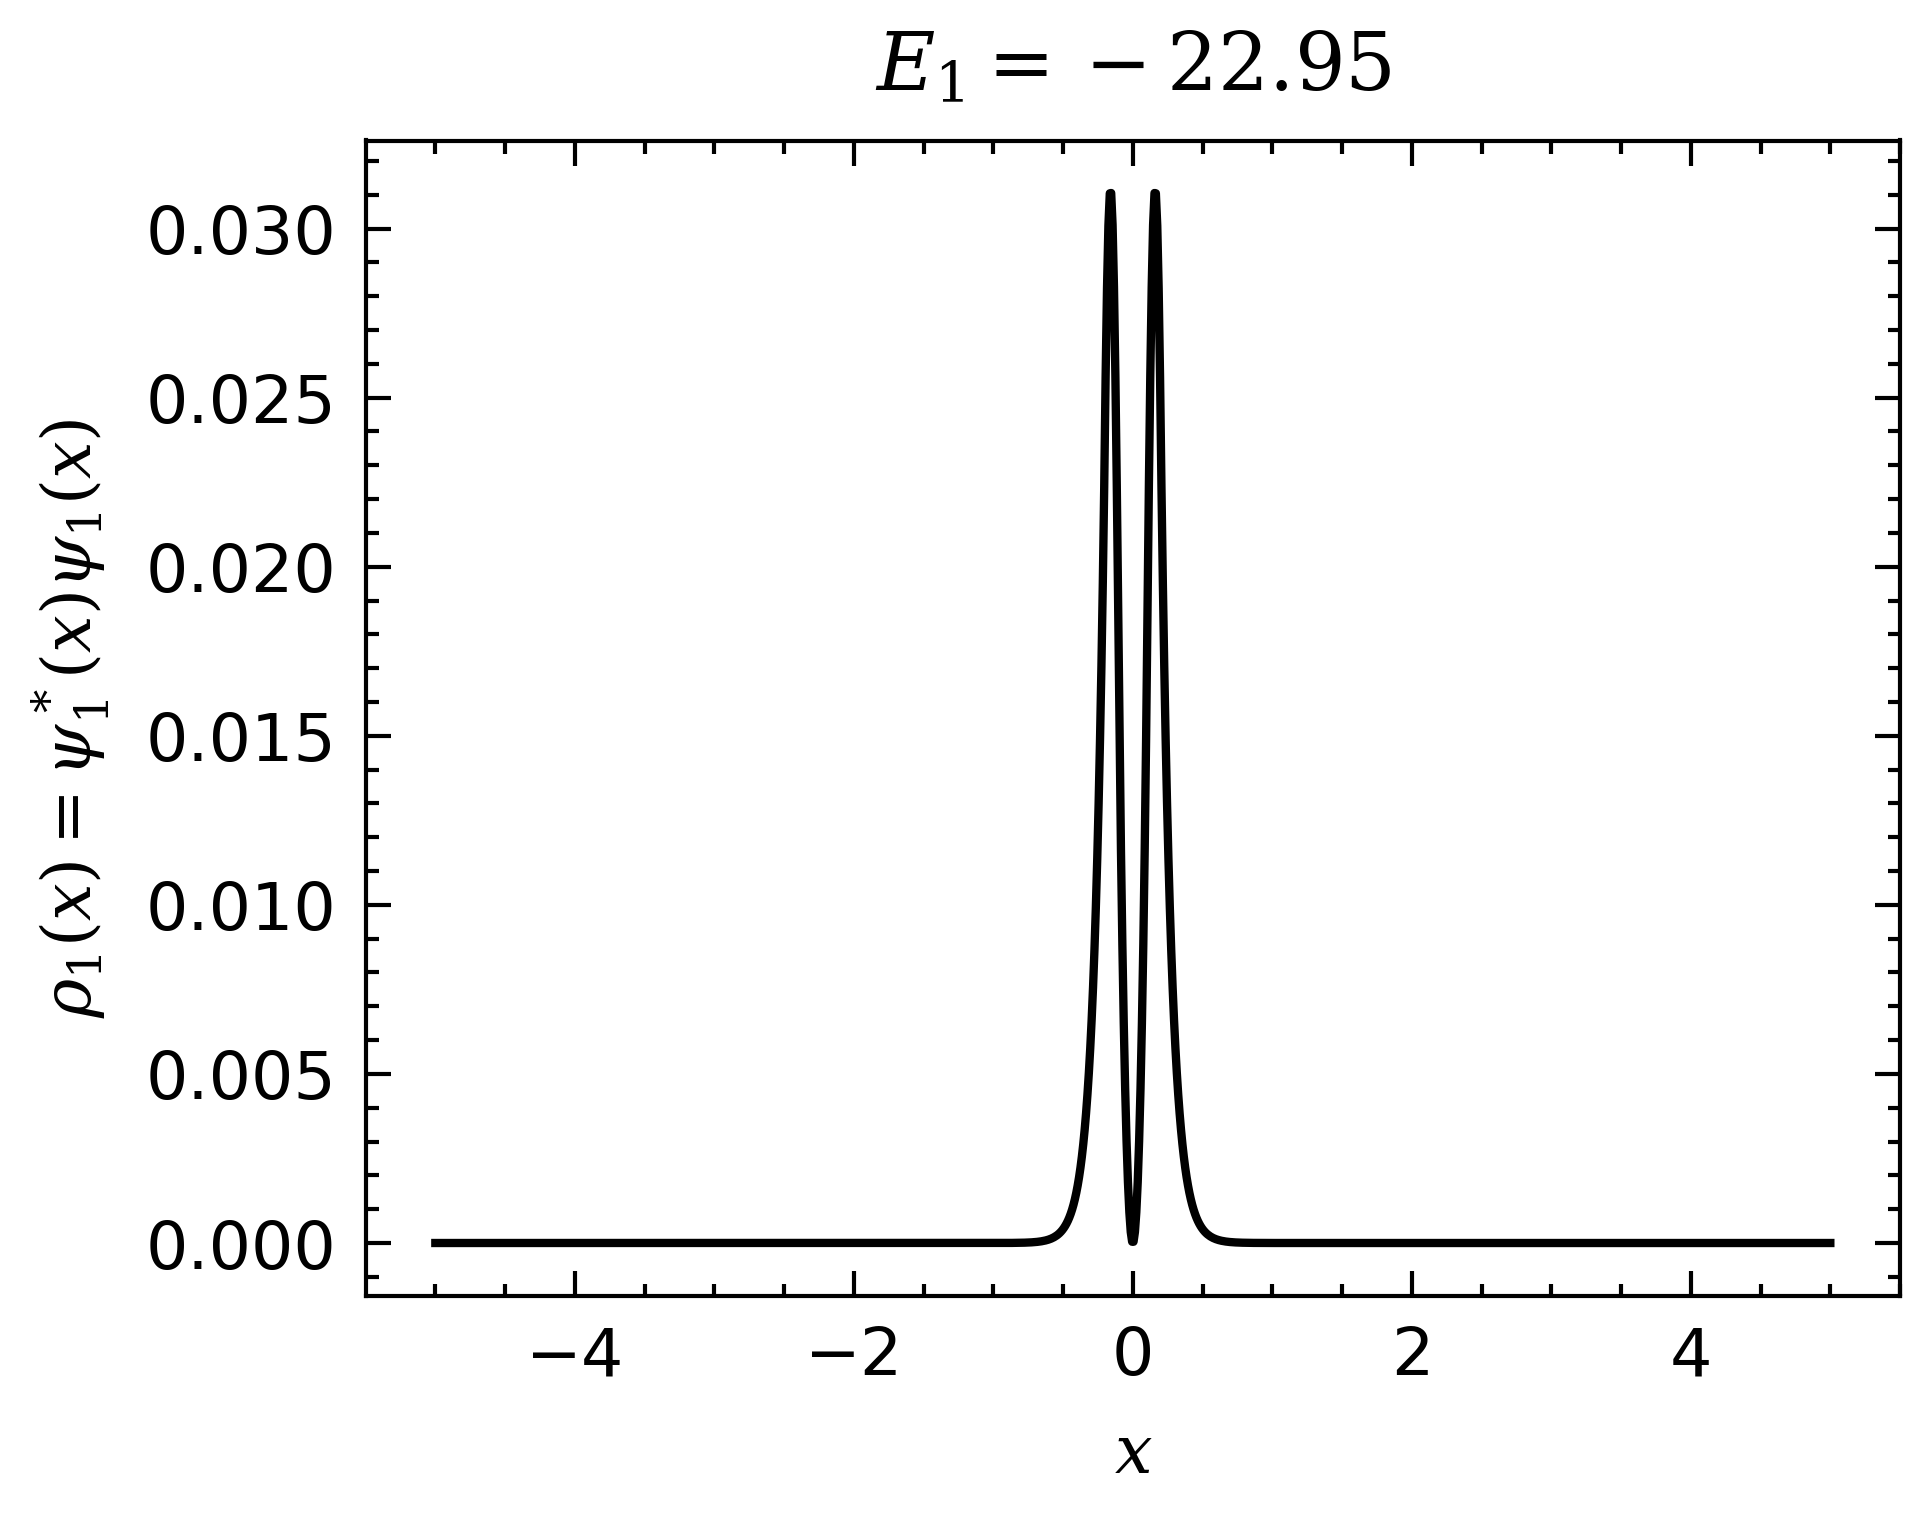

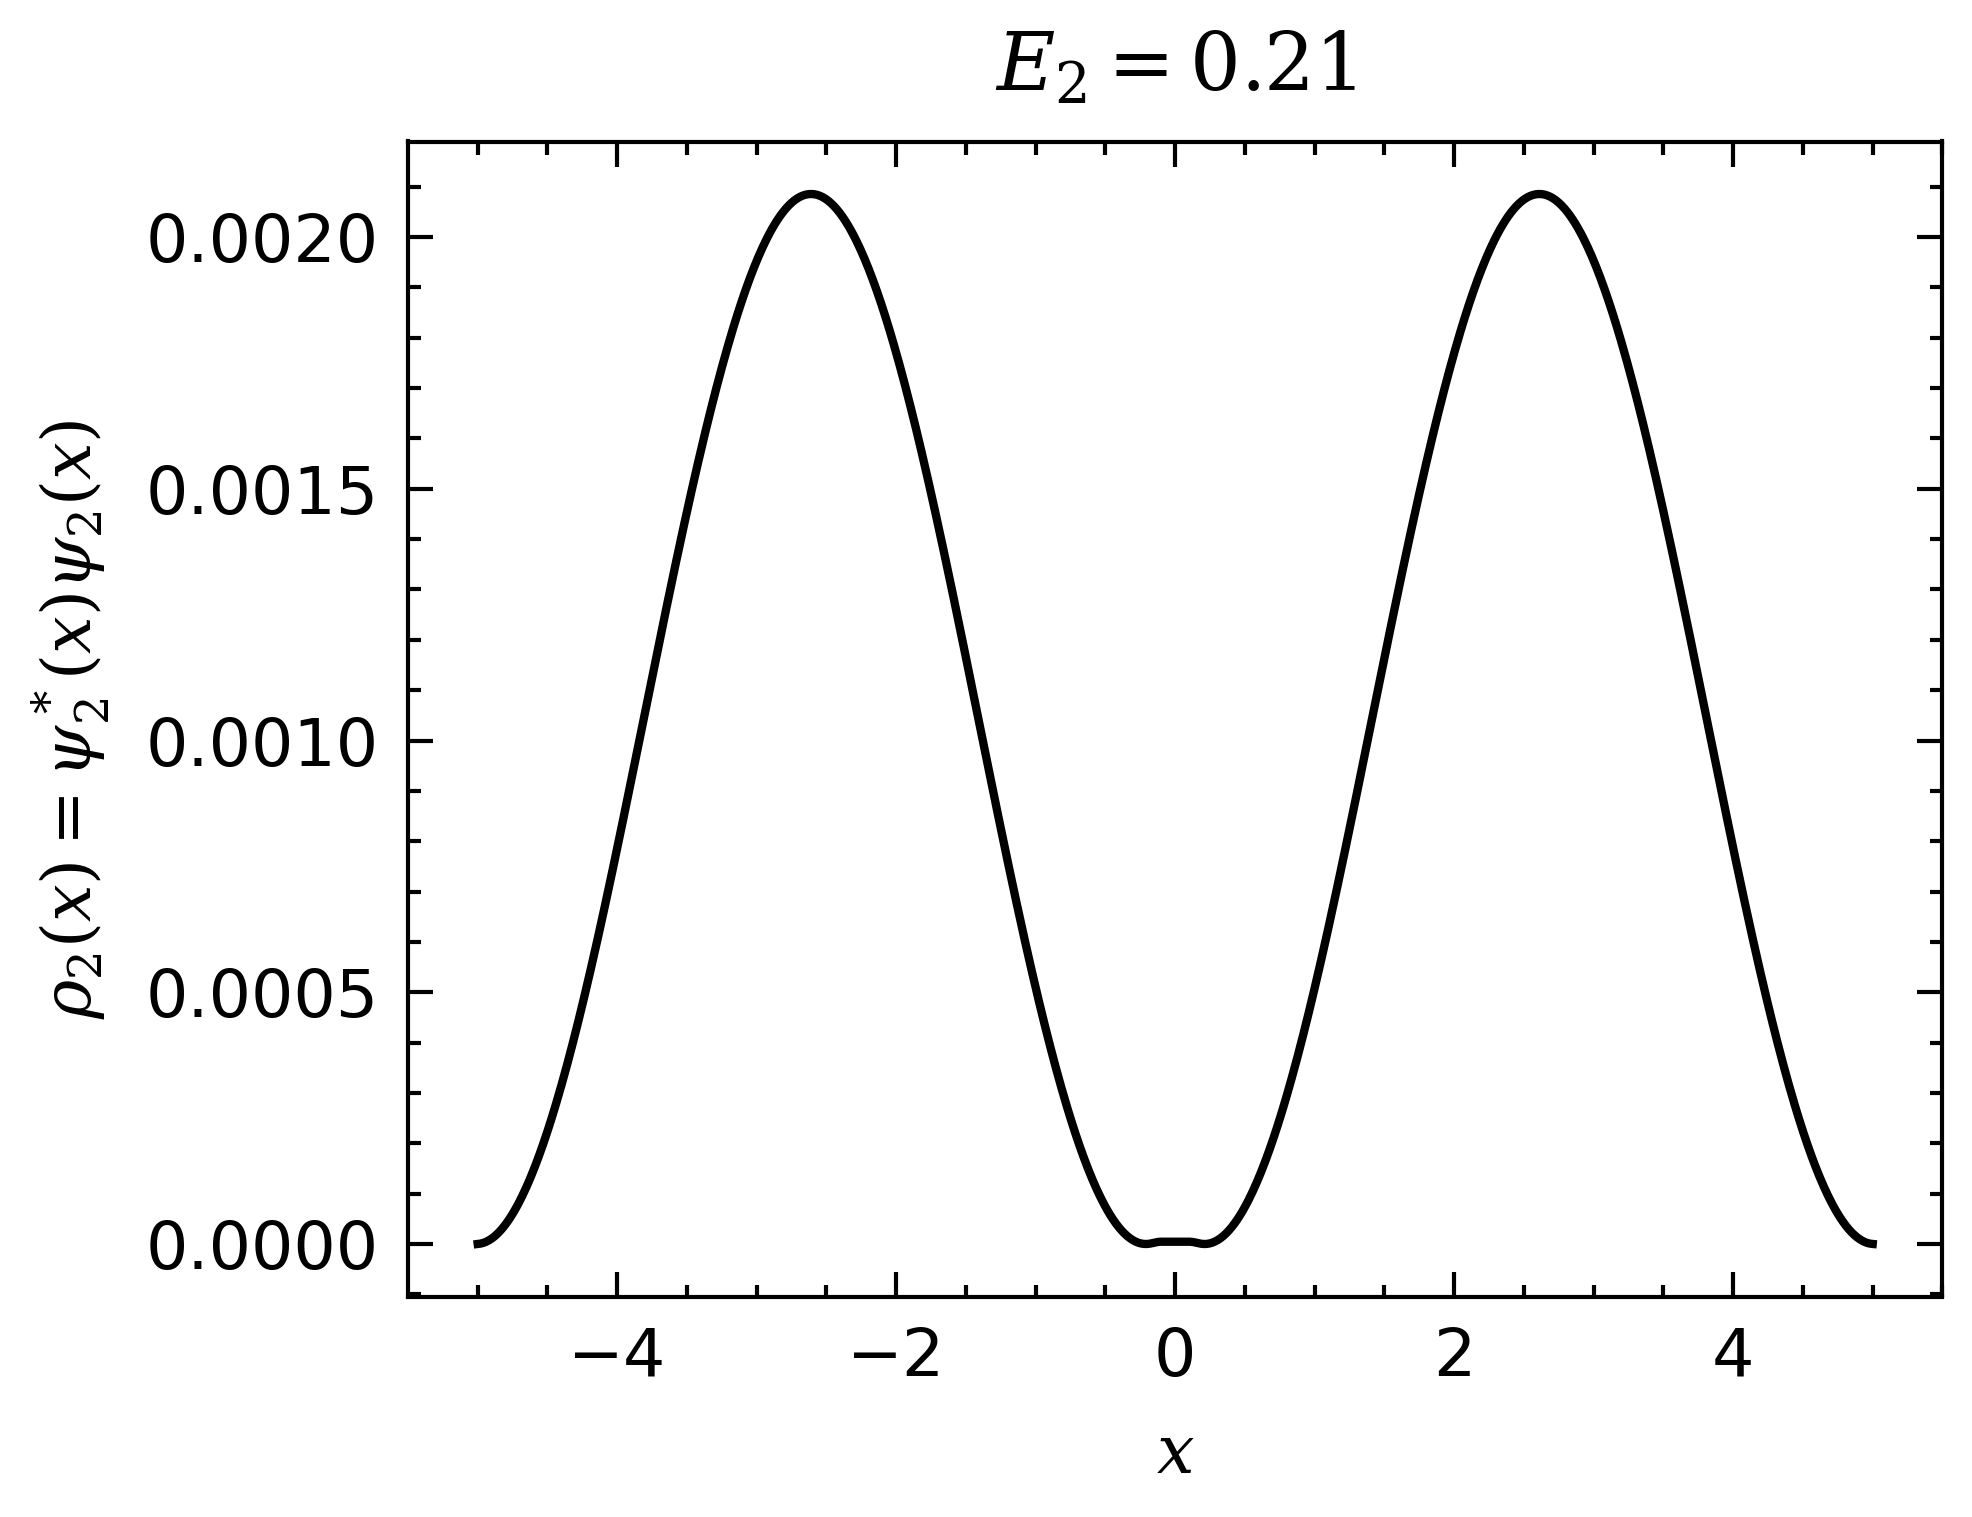

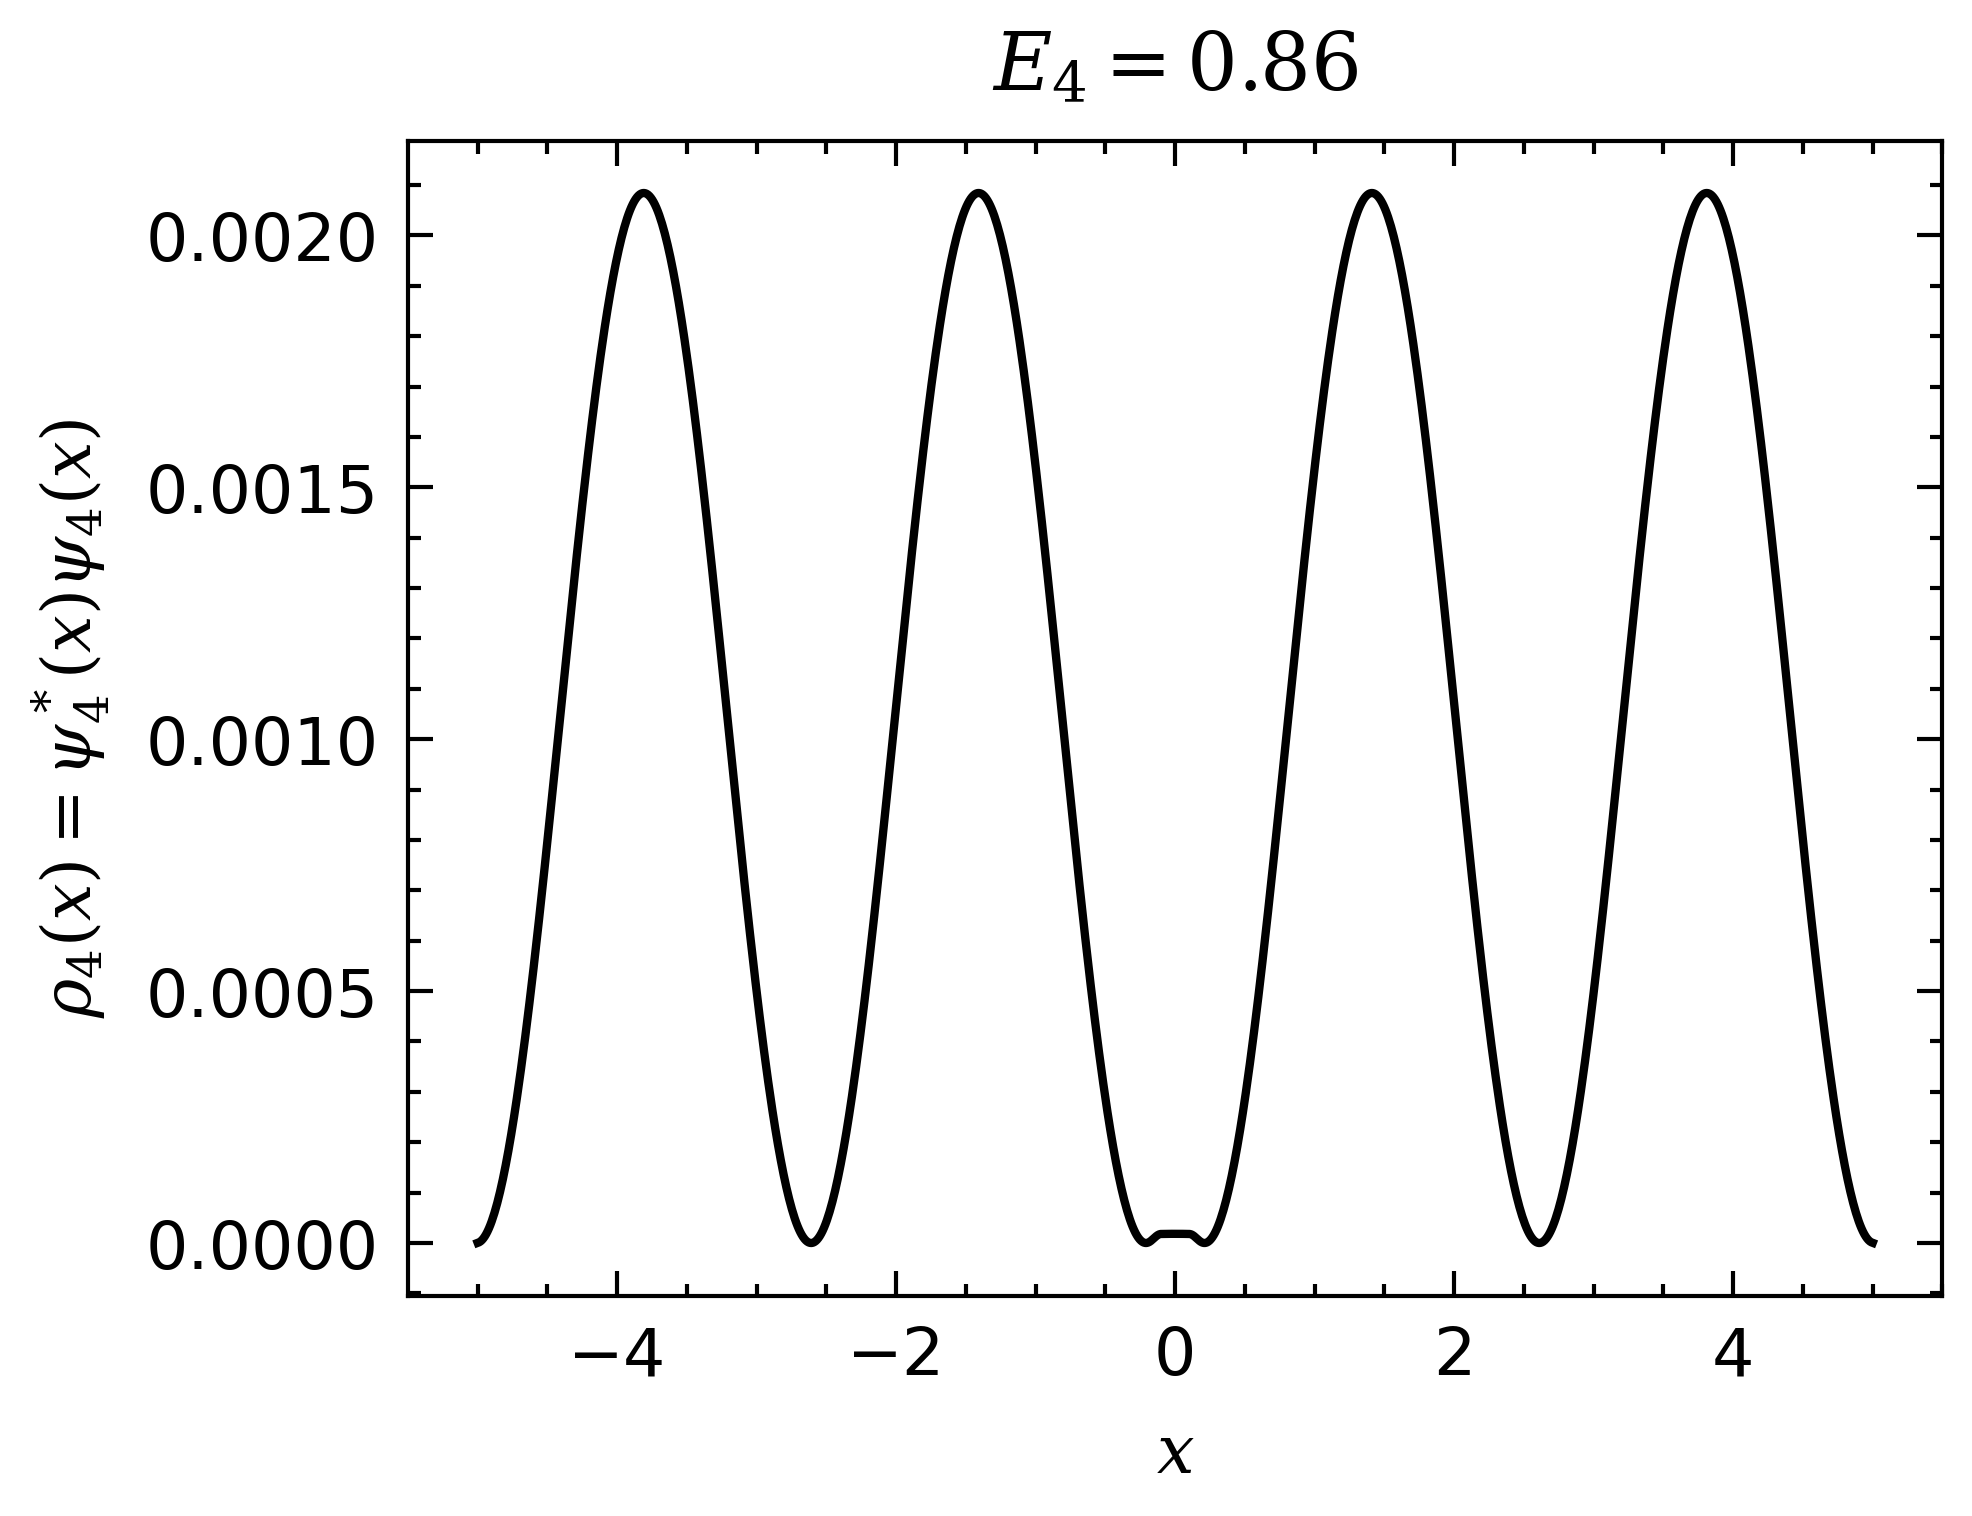

In [33]:
dw = lambda x: double_well(x, xmax=5, N=1000)
dw_shro = Schrodinger(double_well)
dw_shro.plot_density(n=0)
dw_shro.plot_density(n=1)
dw_shro.plot_density(n=2)
dw_shro.plot_density(n=4)

## 2.按照公式：$$\omega_{i+1}=\omega_{i}+[-(\frac{g}{l})\ast \sin \theta_{i} -q\ast \omega_{i} + F_{D}\ast \sin {(\Omega _{D}*t_{i}})]\Delta t$$ $$\theta_{i+1}=\theta_{i}+\omega_{i+1}\ast \Delta t$$ if$$\theta_{i+1}$$ is out of the range [-pi,pi], add or subtract 2pi to keep it in this range

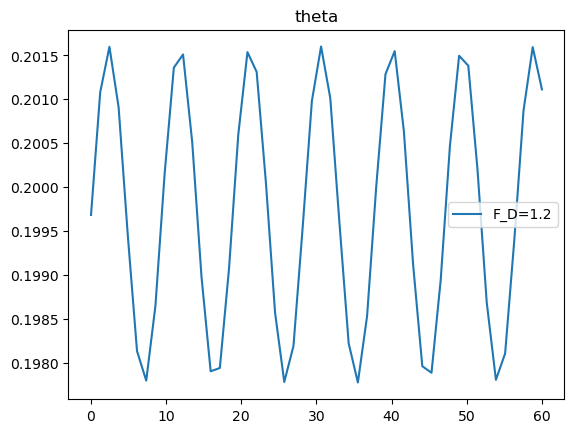

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math
t=np.linspace(0,60)
delt=0.04
omega_sum=0
theta_sum=0.2
g=9.8
l=9.8
q=1/2
F_D=1.2
Omega_D=2/3    
if theta_sum>pi:
    theta_sum-=2*pi
elif theta_sum<-pi:
    theta_sum+=2*pi
omega_sum+=((-g/l)*np.sin(theta_sum)-q*omega_sum+F_D*np.sin(Omega_D*t))*delt
theta_sum+=omega_sum*delt

plt.plot(t,theta_sum)
plt.legend(['F_D=1.2'])
plt.title('theta')
plt.show()

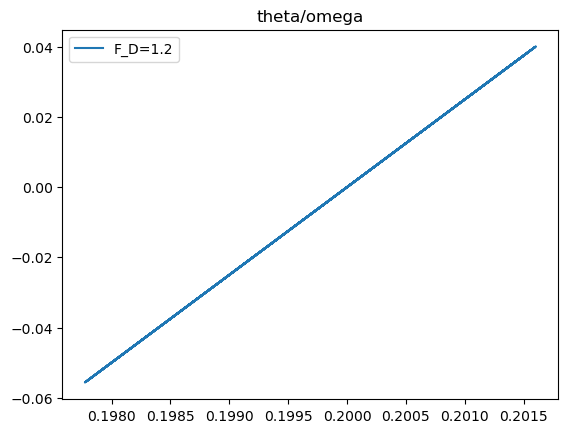

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math
t=np.linspace(0,60)
delt=0.04
omega_sum=0
theta_sum=0.2
g=9.8
l=9.8
q=1/2
F_D=1.2
Omega_D=2/3    
if theta_sum>pi:
    theta_sum-=2*pi
elif theta_sum<-pi:
    theta_sum+=2*pi
omega_sum+=((-g/l)*np.sin(theta_sum)-q*omega_sum+F_D*np.sin(Omega_D*t))*delt
theta_sum+=omega_sum*delt

plt.plot(theta_sum,omega_sum)
plt.legend(['F_D=1.2'])
plt.title('theta/omega')
plt.show()

### 不太清楚哪里出了问题。。。